# Bank Customer Churning Prediction

# 1. Introduction
Predicting customer churn is a critical task for banks to identify customers at risk of leaving and implement strategies to retain them. This project focuses on building a predictive model to determine whether a bank customer is likely to churn, using a popular dataset from Kaggle.

## 1.1 Business Comprehension - Bank Customer Churning

Customer churn refers to the phenomenon of customers ceasing their relationship with a business or service. In the banking sector, churn can result in significant revenue losses and increased costs due to the need to acquire new customers. 

Understanding the drivers behind customer churn enables banks to:
- Enhance customer retention strategies.
- Improve service offerings based on customer behavior insights.
- Optimize marketing efforts towards at-risk customers.

The objective of this project is to leverage machine learning techniques to predict customer churn and identify the factors that influence a customer's decision to leave.

## 1.2 Data comprehension 

The dataset for this project was sourced from Kaggle [[1]](https://www.kaggle.com/datasets/syviaw/bankchurners). It contains customer demographic information, financial attributes, and transaction behavior. The features included in the dataset are:

- **CLIENTNUM:** Unique identification number for each customer.
- **Attrition_Flag:** Target variable indicating customer status:
  - "Attrited Customer" (churned)
  - "Existing Customer" (active)
- **Customer_Age:** Age of the customer in years.
- **Gender:** Gender of the customer.
- **Dependent_count:** Number of dependents reliant on the customer.
- **Education_Level:** Educational background of the customer.
- **Marital_Status:** Marital status of the customer.
- **Income_Category:** Annual income category.
- **Card_Category:** Type of credit card held by the customer.
- **Months_on_book:** Length of the customer's relationship with the bank in months.
- **Total_Relationship_Count:** Number of products/services used by the customer.
- **Months_Inactive_12_mon:** Months of inactivity in the last year.
- **Contacts_Count_12_mon:** Customer's contact frequency with the bank over the past year.
- **Credit_Limit:** Customer's credit limit.
- **Total_Revolving_Bal:** Outstanding revolving credit balance.
- **Avg_Open_To_Buy:** Available credit for purchases.
- **Total_Amt_Chng_Q4_Q1:** Change in transaction amount between Q4 and Q1.
- **Total_Trans_Amt:** Total transaction amount within a given period.
- **Total_Trans_Ct:** Total transaction count within a given period.
- **Total_Ct_Chng_Q4_Q1:** Change in transaction count between Q4 and Q1.
- **Avg_Utilization_Ratio:** Average credit utilization.

Excluded from this project are:
- Two columns related to a Naive Bayes Classifier output.
- The **CLIENTNUM** feature, as it serves only as an identifier and does not contribute to predictive modeling.

This structured approach ensures the focus remains on relevant features to improve the predictive power of the model.

# Exploratory Data Analysis

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pylab as plt 

from statsmodels import robust
from scipy.stats import trim_mean
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

pd.options.display.float_format = '{:.2f}'.format

In [2]:
csv_path = os.getenv('CSV_PATH')
bank_clients = pd.read_csv(csv_path + '/BankChurners.csv')
bank_clients = bank_clients.iloc[:,1:-2]

In [3]:
bank_clients.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.00,777,11914.00,1.33,1144,42,1.62,0.06
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.00,864,7392.00,1.54,1291,33,3.71,0.10
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.00,0,3418.00,2.59,1887,20,2.33,0.00
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.00,2517,796.00,1.41,1171,20,2.33,0.76
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.00,0,4716.00,2.17,816,28,2.50,0.00


In [4]:
print(f'Dataset have {bank_clients.shape[0]} costumers')
print(f'Where each one have {bank_clients.shape[1]} features')
print(f'And the features are: \n {bank_clients.columns}')

Dataset have 10127 costumers
Where each one have 20 features
And the features are: 
 Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


In [5]:
duplicate_costumers = bank_clients.duplicated().sum()
nan_values = bank_clients.isna().sum().sum()

print(f'There are {duplicate_costumers} duplicated costumers')
print(f'And {nan_values} missing values')

There are 0 duplicated costumers
And 0 missing values


In [6]:
bank_clients.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [7]:
num_data_clients = bank_clients.select_dtypes(exclude=['object'])
locations = num_data_clients.describe().T.iloc[:,1:]
locations

,mean,std,min,25%,50%,75%,max
Customer_Age,46.33,8.02,26.00,41.00,46.00,52.00,73.00
Dependent_count,2.35,1.30,0.00,1.00,2.00,3.00,5.00
Months_on_book,35.93,7.99,13.00,31.00,36.00,40.00,56.00
Total_Relationship_Count,3.81,1.55,1.00,3.00,4.00,5.00,6.00
Months_Inactive_12_mon,2.34,1.01,0.00,2.00,2.00,3.00,6.00
Contacts_Count_12_mon,2.46,1.11,0.00,2.00,2.00,3.00,6.00
Credit_Limit,8631.95,9088.78,1438.30,2555.00,4549.00,11067.50,34516.00
Total_Revolving_Bal,1162.81,814.99,0.00,359.00,1276.00,1784.00,2517.00
Avg_Open_To_Buy,7469.14,9090.69,3.00,1324.50,3474.00,9859.00,34516.00
Total_Amt_Chng_Q4_Q1,0.76,0.22,0.00,0.63,0.74,0.86,3.40


In [8]:
# trimmed mean
locations['Trim mean'] = trim_mean(num_data_clients, 0.1)
locations

,mean,std,min,25%,50%,75%,max,Trim mean
Customer_Age,46.33,8.02,26.00,41.00,46.00,52.00,73.00,46.35
Dependent_count,2.35,1.30,0.00,1.00,2.00,3.00,5.00,2.37
Months_on_book,35.93,7.99,13.00,31.00,36.00,40.00,56.00,35.99
Total_Relationship_Count,3.81,1.55,1.00,3.00,4.00,5.00,6.00,3.88
Months_Inactive_12_mon,2.34,1.01,0.00,2.00,2.00,3.00,6.00,2.29
Contacts_Count_12_mon,2.46,1.11,0.00,2.00,2.00,3.00,6.00,2.46
Credit_Limit,8631.95,9088.78,1438.30,2555.00,4549.00,11067.50,34516.00,6685.09
Total_Revolving_Bal,1162.81,814.99,0.00,359.00,1276.00,1784.00,2517.00,1148.50
Avg_Open_To_Buy,7469.14,9090.69,3.00,1324.50,3474.00,9859.00,34516.00,5514.94
Total_Amt_Chng_Q4_Q1,0.76,0.22,0.00,0.63,0.74,0.86,3.40,0.74


#### *Estimates of Variability*

In [9]:
# Robust scale MAD
locations['MAD scale'] = robust.scale.mad(num_data_clients)

In [10]:
locations['IQR'] = locations['75%'] - locations['25%']
locations

,mean,std,min,25%,50%,75%,max,Trim mean,MAD scale,IQR
Customer_Age,46.33,8.02,26.00,41.00,46.00,52.00,73.00,46.35,8.90,11.00
Dependent_count,2.35,1.30,0.00,1.00,2.00,3.00,5.00,2.37,1.48,2.00
Months_on_book,35.93,7.99,13.00,31.00,36.00,40.00,56.00,35.99,5.93,9.00
Total_Relationship_Count,3.81,1.55,1.00,3.00,4.00,5.00,6.00,3.88,1.48,2.00
Months_Inactive_12_mon,2.34,1.01,0.00,2.00,2.00,3.00,6.00,2.29,1.48,1.00
Contacts_Count_12_mon,2.46,1.11,0.00,2.00,2.00,3.00,6.00,2.46,1.48,1.00
Credit_Limit,8631.95,9088.78,1438.30,2555.00,4549.00,11067.50,34516.00,6685.09,3844.39,8512.50
Total_Revolving_Bal,1162.81,814.99,0.00,359.00,1276.00,1784.00,2517.00,1148.50,876.22,1425.00
Avg_Open_To_Buy,7469.14,9090.69,3.00,1324.50,3474.00,9859.00,34516.00,5514.94,3951.13,8534.50
Total_Amt_Chng_Q4_Q1,0.76,0.22,0.00,0.63,0.74,0.86,3.40,0.74,0.17,0.23


#### *Histograms*

In [11]:
# Freedman-Diaconis rule
def get_bins(data):
    q25, q75 = np.percentile(data, [25, 75])
    iqr = q75 - q25
    bin_width = 2 * iqr * len(data) ** (-1 / 3)
    return int(np.ceil((data.max() - data.min()) / bin_width))

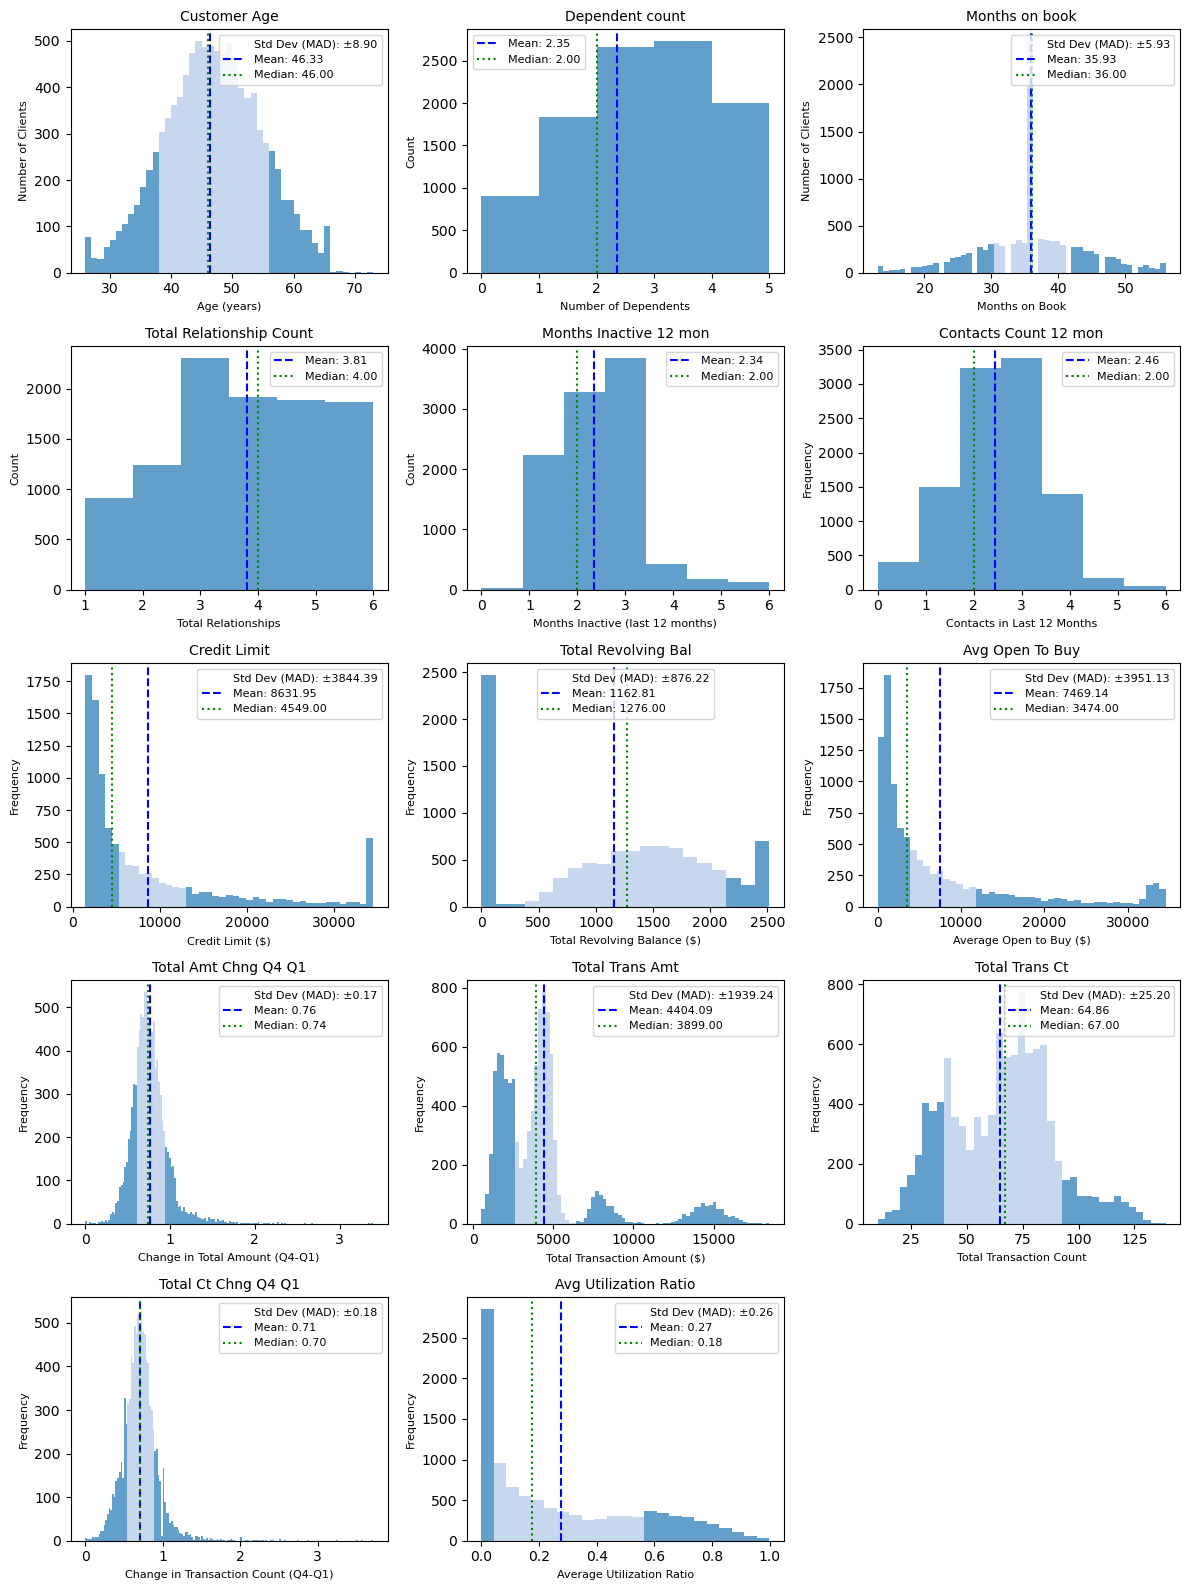

In [12]:
fig, axs = plt.subplots(5, 3, figsize=(12, 16))

plot_data = [
    ("Customer_Age", get_bins(bank_clients['Customer_Age']), "Age (years)", "Number of Clients"),
    ("Dependent_count", 5, "Number of Dependents", "Count"),
    ("Months_on_book", get_bins(bank_clients['Months_on_book']), "Months on Book", "Number of Clients"),
    ("Total_Relationship_Count", 6, "Total Relationships", "Count"),
    ("Months_Inactive_12_mon", 7, "Months Inactive (last 12 months)", "Count"),
    ("Contacts_Count_12_mon", 7, "Contacts in Last 12 Months", "Frequency"),
    ("Credit_Limit", get_bins(bank_clients['Credit_Limit']), "Credit Limit ($)", "Frequency"),
    ("Total_Revolving_Bal", get_bins(bank_clients['Total_Revolving_Bal']), "Total Revolving Balance ($)", "Frequency"),
    ("Avg_Open_To_Buy", get_bins(bank_clients['Avg_Open_To_Buy']), "Average Open to Buy ($)", "Frequency"),
    ("Total_Amt_Chng_Q4_Q1", get_bins(bank_clients['Total_Amt_Chng_Q4_Q1']), "Change in Total Amount (Q4-Q1)", "Frequency"),
    ("Total_Trans_Amt", get_bins(bank_clients['Total_Trans_Amt']), "Total Transaction Amount ($)", "Frequency"),
    ("Total_Trans_Ct", get_bins(bank_clients['Total_Trans_Ct']), "Total Transaction Count", "Frequency"),
    ("Total_Ct_Chng_Q4_Q1", get_bins(bank_clients['Total_Ct_Chng_Q4_Q1']), "Change in Transaction Count (Q4-Q1)", "Frequency"),
    ("Avg_Utilization_Ratio", get_bins(bank_clients['Avg_Utilization_Ratio']), "Average Utilization Ratio", "Frequency")
]

for ax, (col, bins, xlabel, ylabel) in zip(axs.flat, plot_data):
    data = bank_clients[col]
    
    mean = np.mean(data)
    median = np.median(data)
    deviation = robust.scale.mad(data)
    
    n, bins, patches = ax.hist(data, bins=bins, alpha=0.7)

    if not col in ("Dependent_count", "Total_Relationship_Count", "Months_Inactive_12_mon", "Contacts_Count_12_mon"):
        for i in range(len(bins)-1):
            if  mean-deviation < bins[i] < mean+deviation:
                patches[i].set_facecolor('#aec7e8')
        
        ax.axvline(mean + deviation, color="#aec7e8", alpha=0, label=f"Std Dev (MAD): ±{deviation:.2f}")
        ax.axvline(mean - deviation, color="#aec7e8", alpha=0)

    ax.axvline(mean, color="blue", linestyle="--", label=f"Mean: {mean:.2f}")
    ax.axvline(median, color="green", linestyle=":", label=f"Median: {median:.2f}")
    
    ax.set_title(col.replace("_", " "), fontsize=10)
    ax.set_xlabel(xlabel, fontsize=8)
    ax.set_ylabel(ylabel, fontsize=8)
    ax.legend(fontsize=8)

for ax in axs.flat[len(plot_data):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

#### *Plot Boxes*

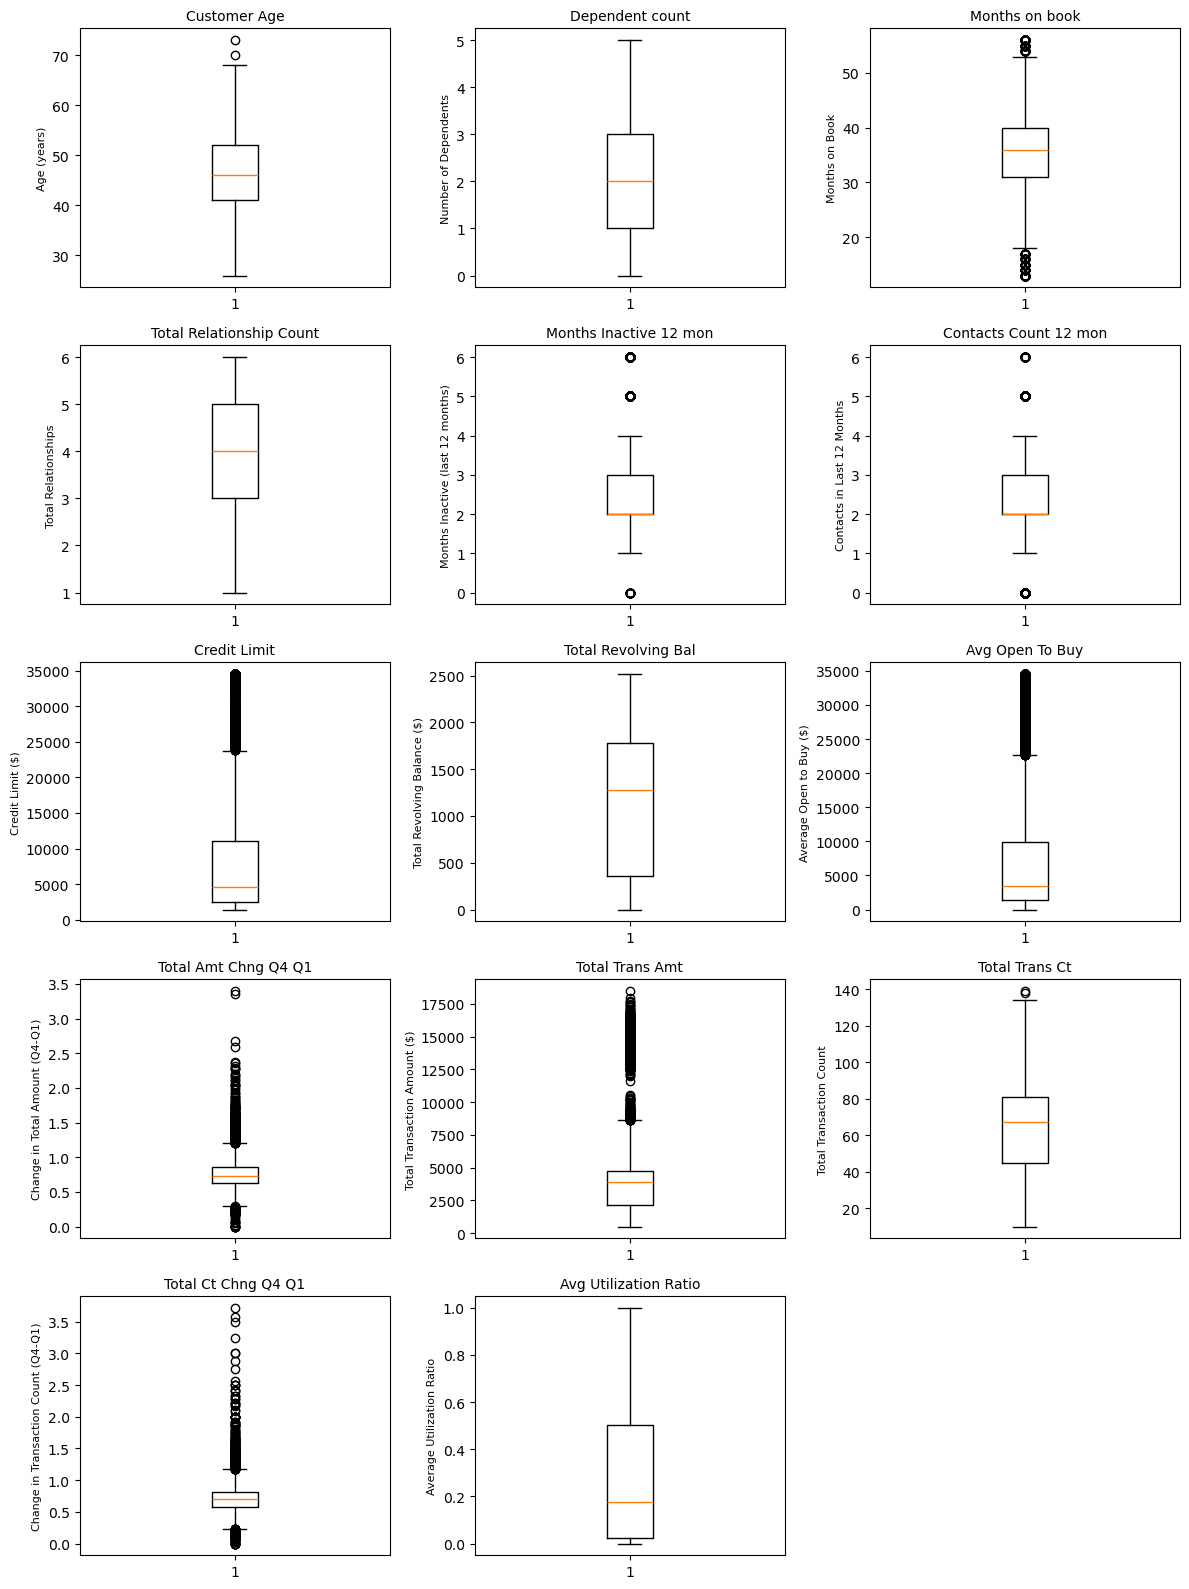

In [13]:
fig, axs = plt.subplots(5, 3, figsize=(12, 16))

for ax, (col, bins, xlabel, ylabel) in zip(axs.flat, plot_data):
    data = bank_clients[col]
    
    mean = np.mean(data)
    median = np.median(data)
    deviation = robust.scale.mad(data)
    
    ax.boxplot(data)

    ax.set_title(col.replace("_", " "), fontsize=10)
    ax.set_ylabel(xlabel, fontsize=8)

for ax in axs.flat[len(plot_data):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

In [14]:
num_data_clients.corr()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Customer_Age,1.00,-0.12,0.79,-0.01,0.05,-0.02,0.00,0.01,0.00,-0.06,-0.05,-0.07,-0.01,0.01
Dependent_count,-0.12,1.00,-0.10,-0.04,-0.01,-0.04,0.07,-0.00,0.07,-0.04,0.03,0.05,0.01,-0.04
Months_on_book,0.79,-0.10,1.00,-0.01,0.07,-0.01,0.01,0.01,0.01,-0.05,-0.04,-0.05,-0.01,-0.01
Total_Relationship_Count,-0.01,-0.04,-0.01,1.00,-0.00,0.06,-0.07,0.01,-0.07,0.05,-0.35,-0.24,0.04,0.07
Months_Inactive_12_mon,0.05,-0.01,0.07,-0.00,1.00,0.03,-0.02,-0.04,-0.02,-0.03,-0.04,-0.04,-0.04,-0.01
Contacts_Count_12_mon,-0.02,-0.04,-0.01,0.06,0.03,1.00,0.02,-0.05,0.03,-0.02,-0.11,-0.15,-0.09,-0.06
Credit_Limit,0.00,0.07,0.01,-0.07,-0.02,0.02,1.00,0.04,1.00,0.01,0.17,0.08,-0.00,-0.48
Total_Revolving_Bal,0.01,-0.00,0.01,0.01,-0.04,-0.05,0.04,1.00,-0.05,0.06,0.06,0.06,0.09,0.62
Avg_Open_To_Buy,0.00,0.07,0.01,-0.07,-0.02,0.03,1.00,-0.05,1.00,0.01,0.17,0.07,-0.01,-0.54
Total_Amt_Chng_Q4_Q1,-0.06,-0.04,-0.05,0.05,-0.03,-0.02,0.01,0.06,0.01,1.00,0.04,0.01,0.38,0.04


<Axes: >

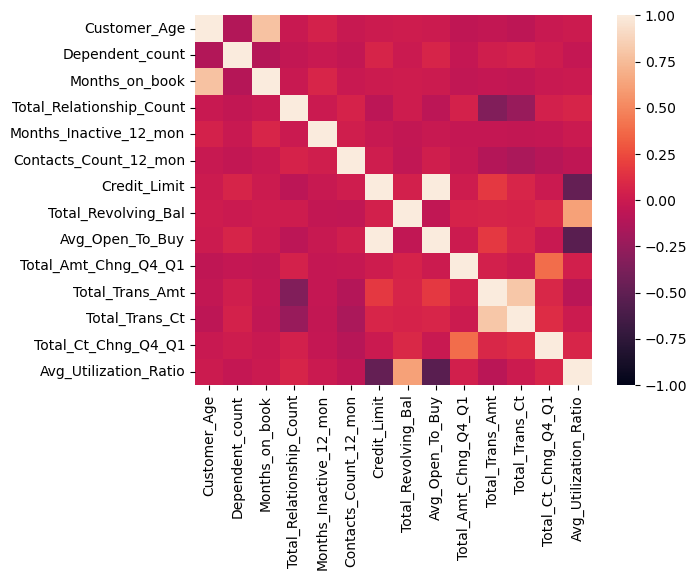

In [15]:
sns.heatmap(num_data_clients.corr(), vmin=-1, vmax=1)

#### *Scatterplots*

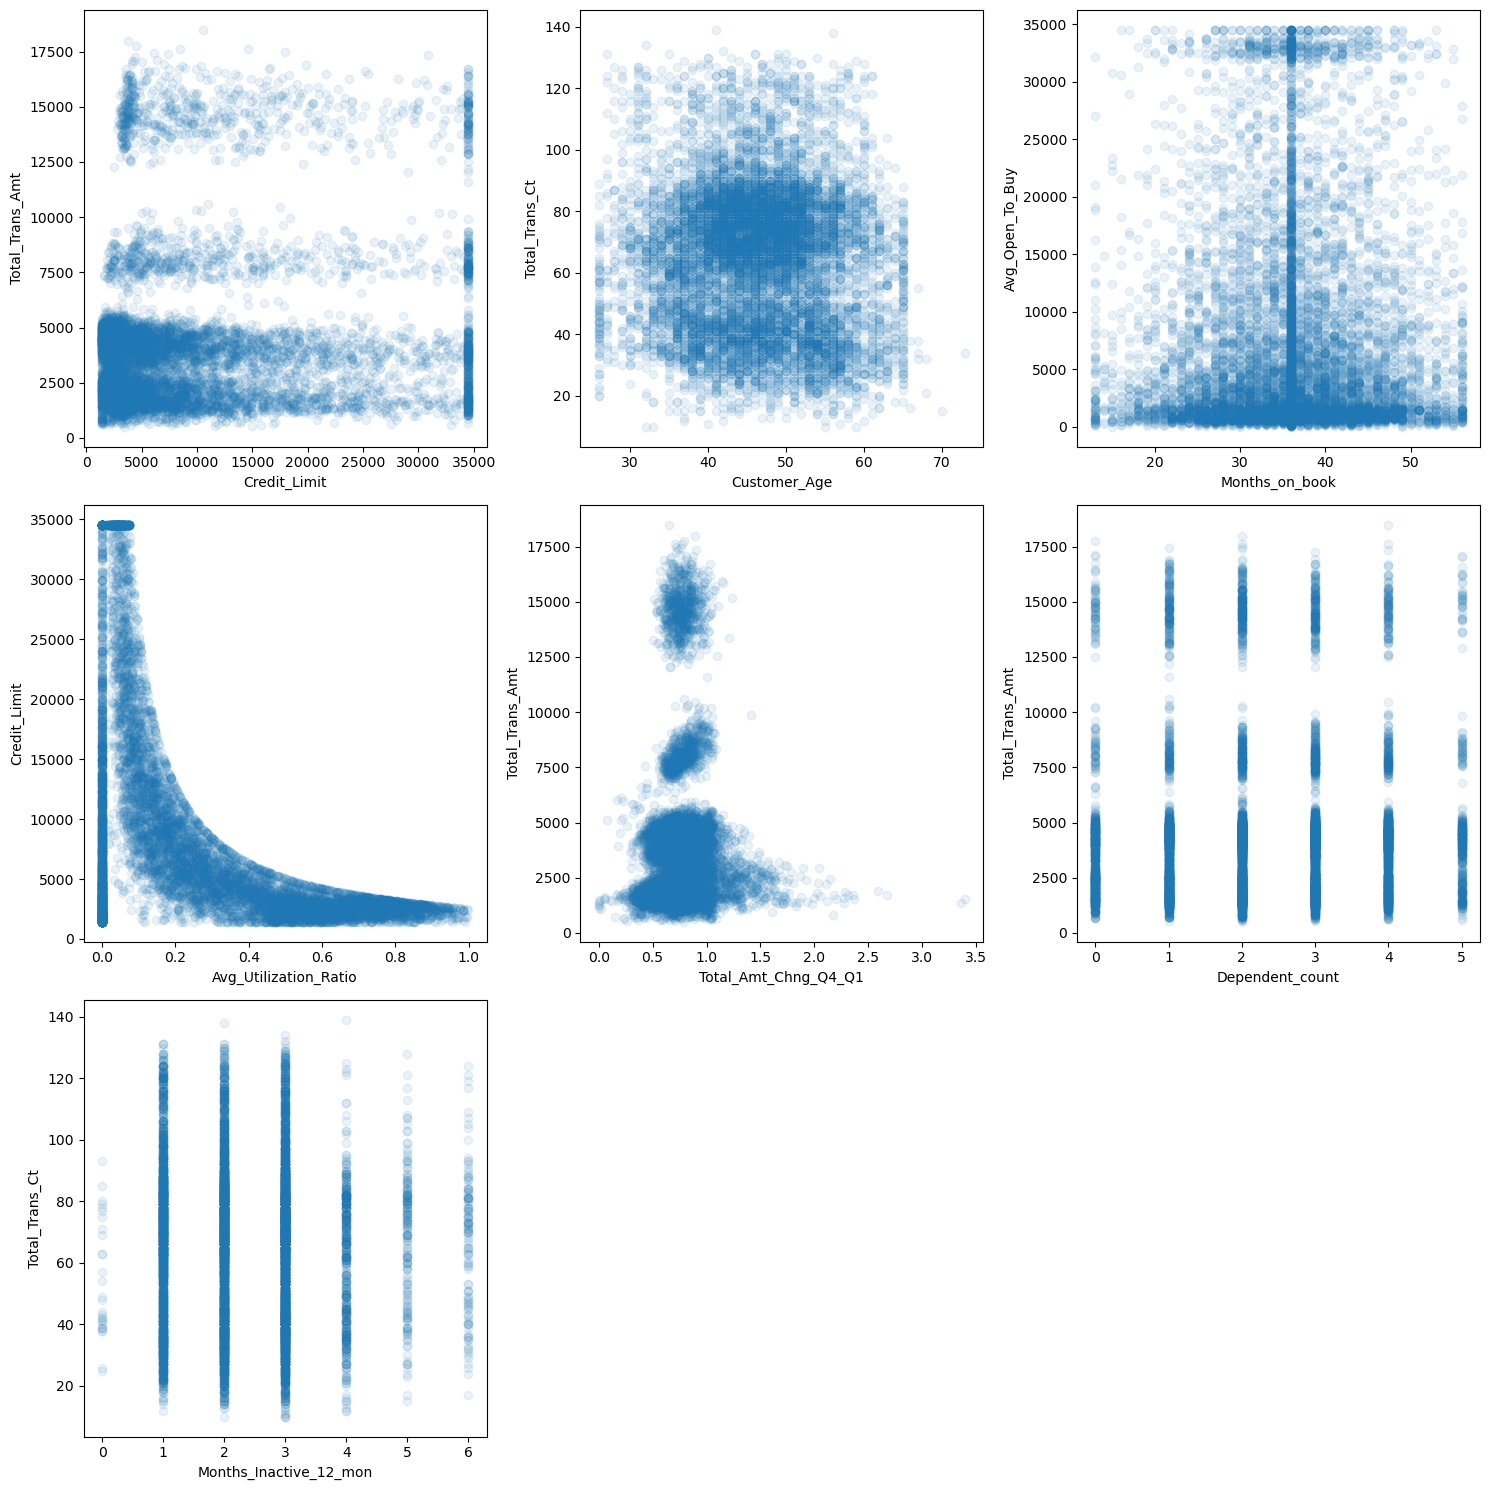

In [16]:
scatterpot_data = [
        ('Credit_Limit', 'Total_Trans_Amt'),
        ('Customer_Age','Total_Trans_Ct'),
        ('Months_on_book','Avg_Open_To_Buy'),
        ('Avg_Utilization_Ratio','Credit_Limit'),
        ('Total_Amt_Chng_Q4_Q1','Total_Trans_Amt'),
        ('Dependent_count','Total_Trans_Amt'),
        ('Months_Inactive_12_mon','Total_Trans_Ct')
]

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for ax, data in zip(axs.flat, scatterpot_data):
        x = bank_clients[data[0]]
        y = bank_clients[data[1]]
        ax.scatter(x=x, y=y, alpha = 0.09)
        ax.set_xlabel(data[0])
        ax.set_ylabel(data[1])

for ax in axs.flat[len(scatterpot_data):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()        

In [17]:
a = ['Credit_Limit', 'Total_Trans_Amt']
bank_clients['Credit_Limit']

0       12691.00
1        8256.00
2        3418.00
3        3313.00
4        4716.00
          ...   
10122    4003.00
10123    4277.00
10124    5409.00
10125    5281.00
10126   10388.00
Name: Credit_Limit, Length: 10127, dtype: float64

## 2.2 Data Preparation

In [18]:
features = [
    'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
    'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
    'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
    'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
]

target = 'Attrition_Flag'

X = bank_clients[features]
y = bank_clients[target].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [19]:
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop='first'), cat_features)
    ]
)

## 2.3 Model predicting Implementation.

In [20]:
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [21]:
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

## 2.4 Evaluating Predictions

In [22]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1701
           1       0.94      0.74      0.83       325

    accuracy                           0.95      2026
   macro avg       0.95      0.86      0.90      2026
weighted avg       0.95      0.95      0.95      2026

Confusion Matrix:
 [[1687   14]
 [  86  239]]
ROC-AUC Score: 0.9836159725048614


# 3.Results

In [23]:
new_data = pd.DataFrame({
    'Customer_Age': [45],
    'Gender': ['F'],
    'Dependent_count': [2],
    'Education_Level': ['Graduate'],
    'Marital_Status': ['Married'],
    'Income_Category': ['$80K - $120K'],
    'Card_Category': ['Platinum'],
    'Months_on_book': [36],
    'Total_Relationship_Count': [4],
    'Months_Inactive_12_mon': [1],
    'Contacts_Count_12_mon': [2],
    'Credit_Limit': [12000],
    'Total_Revolving_Bal': [1500],
    'Avg_Open_To_Buy': [10500],
    'Total_Amt_Chng_Q4_Q1': [1.2],
    'Total_Trans_Amt': [3000],
    'Total_Trans_Ct': [42],
    'Total_Ct_Chng_Q4_Q1': [0.9],
    'Avg_Utilization_Ratio': [0.12]
})

churn_prediction = pipeline.predict(new_data)
churn_probability = pipeline.predict_proba(new_data)[:, 1]

print("Churn Prediction (0=No Churn, 1=Churn):", churn_prediction)
print("Churn Probability:", churn_probability)


Churn Prediction (0=No Churn, 1=Churn): [0]
Churn Probability: [0.06]


# 4. References

[1] Syviaw, "BankChurners," [Online]. Available: https://www.kaggle.com/datasets/syviaw/bankchurners. [Accessed: Dec. 17, 2024].